In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
apple = pd.read_csv("AAPL.csv")
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-29,131.229996,131.449997,129.899994,130.279999,120.067184,50884500
1,2015-06-01,130.279999,131.389999,130.050003,130.539993,120.306801,32112800
2,2015-06-02,129.860001,130.660004,129.320007,129.960007,119.772255,33667600
3,2015-06-03,130.660004,130.940002,129.899994,130.119995,119.919716,30983500
4,2015-06-04,129.580002,130.580002,128.910004,129.360001,119.219307,38450100
...,...,...,...,...,...,...,...
1254,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1255,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800
1256,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500
1257,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28236300


#### Visualising Data

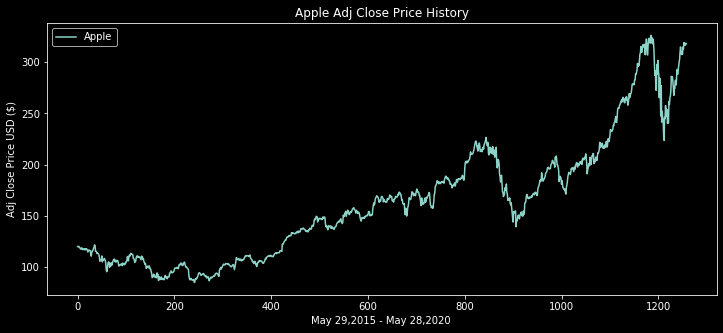

In [4]:
plt.figure(figsize=(12, 5))

plt.title('Apple Adj Close Price History')
plt.xlabel("May 29,2015 - May 28,2020 ")
plt.ylabel("Adj Close Price USD ($)")
plt.plot(apple['Adj Close'], label='Apple')
plt.legend(loc="upper left")
plt.show()

#### Create a Simple moving average with a 30 day window

In [5]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = apple['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,293.310716
1255,295.031499
1256,296.505422
1257,297.566586


#### Create a Simple moving average 100 day window

In [6]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = apple['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,290.630966
1255,290.919420
1256,291.165082
1257,291.357882


### Visualize the new data

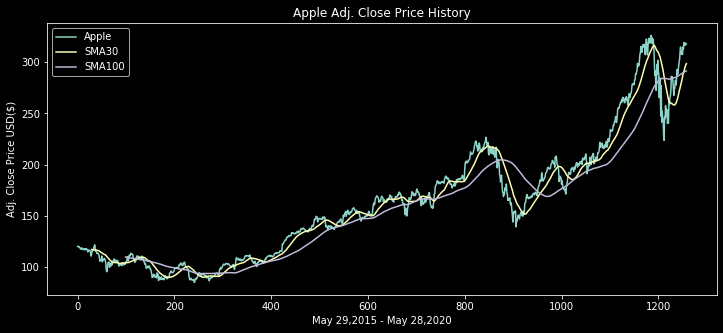

In [7]:
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close'], label='Apple')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('May 29,2015 - May 28,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

#### Create a new Data Frame to store all the data

In [8]:
data = pd.DataFrame()
data['apple'] = apple['Adj Close']
data['SMA30'] = sma30['Adj Close']
data['SMA100'] = sma100['Adj Close']
data

,apple,SMA30,SMA100
0,120.067184,NaN,NaN
1,120.306801,NaN,NaN
2,119.772255,NaN,NaN
3,119.919716,NaN,NaN
4,119.219307,NaN,NaN
...,...,...,...
1254,316.850006,293.310716,290.630966
1255,318.890015,295.031499,290.919420
1256,316.730011,296.505422,291.165082
1257,318.109985,297.566586,291.357882


#### Create a function to signal when to buy or sell stock

In [9]:
def buySell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data ['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceSell.append(data['apple'][i])
                sigPriceBuy.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceSell.append(np.nan)
                sigPriceBuy.append(data['apple'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy, sigPriceSell)

#### Store the buy and sell  data into a variable

In [10]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,120.067184,NaN,NaN,NaN,NaN
1,120.306801,NaN,NaN,NaN,NaN
2,119.772255,NaN,NaN,NaN,NaN
3,119.919716,NaN,NaN,NaN,NaN
4,119.219307,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,316.850006,293.310716,290.630966,NaN,NaN
1255,318.890015,295.031499,290.919420,NaN,NaN
1256,316.730011,296.505422,291.165082,NaN,NaN
1257,318.109985,297.566586,291.357882,NaN,NaN


### Visualize the data and strategy to buy and sell stock

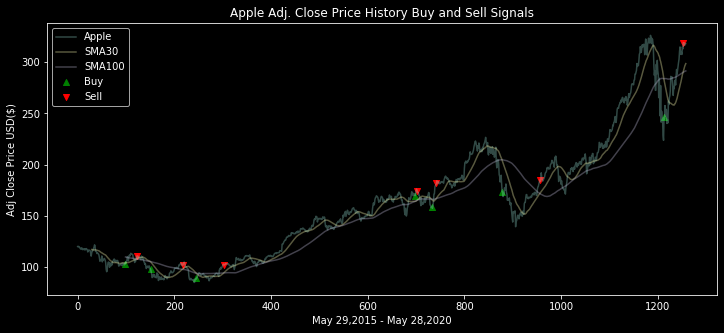

In [11]:
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("May 29,2015 - May 28,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()